# 6.7 Further Exploration

## This script contains the following:

#### Importing your libraries and data
#### Subsetting, wrangling, and cleaning time-series data
#### Scatterplot: Price and Prev_sold_date
#### Create new column 'lot_classification' based on acre_lot size
#### Adjust 0s in prev_sold_date column to today's date for ease of analyzing data
#### Export new data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path,'Prepared Data', 're_clean9.pkl'))

In [5]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category,status_id,new_build
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,1,new_build
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,1,new_build
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,1,new_build
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Low price,1,new_build
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,1,new_build


In [6]:
# Reordering the columns
new_column_order = ['brokered_by', 'status', 'status_id', 'price', 'bed', 'bath','acre_lot', 'street', 'city', 'state', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'Price category', 'new_build']
df = df[new_column_order]

In [7]:
df.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,new_build
0,103378.0,for_sale,1,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,new_build
1,52707.0,for_sale,1,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,new_build
2,103379.0,for_sale,1,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,new_build
3,31239.0,for_sale,1,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,Ponce,Puerto Rico,731.0,1800.000,0,Low price,new_build
4,34632.0,for_sale,1,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,new_build


In [8]:

# Renaming a column
df.rename(columns={'new_build': 'build_status'}, inplace=True)

In [9]:
df.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,build_status
0,103378.0,for_sale,1,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,new_build
1,52707.0,for_sale,1,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,new_build
2,103379.0,for_sale,1,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,new_build
3,31239.0,for_sale,1,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,Ponce,Puerto Rico,731.0,1800.000,0,Low price,new_build
4,34632.0,for_sale,1,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,new_build


In [10]:
df['build_status'].unique()

array(['new_build', 'established'], dtype=object)

In [11]:
df['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

In [12]:
df['status_id'].unique() #1=for sale, 2=ready to build 3= sold

array([1, 2, 3])

In [13]:
#subset for all homes that are 'for_sale'
df_for_sale = df[df['status']== 'for_sale']

In [14]:
# see how many are for sale
df_for_sale.shape

(1381789, 17)

In [15]:
# subset of all established homes
df_estab = df[df['build_status'] == 'established']

In [16]:
# see how many are establihsed
df_estab.shape

(1483878, 17)

In [17]:
#subset for all sold homes 
df_sold = df[df['status'] == 'sold']

In [18]:
# see how many are sold
df_sold.shape

(807166, 17)

In [19]:
#subset for ready_to_build
df_ready_to_build = df[df['status'] == 'ready_to_build']

In [20]:
df_ready_to_build.shape

(24774, 17)

### 1381789 for sale (1)
### 1483878 are established 
### 807166  sold (3)
### 24774 ready to build (2)

In [21]:
# let's look at the sold homes to check their dates (to see if they all have dates)
df_sold.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,build_status
1412857,62066.0,sold,3,77500.0,3.000000,1.000000,0.26,1072625.0,Ponce,Puerto Rico,Ponce,Puerto Rico,717.0,957.0,2021-11-29,Low price,established
1412858,72457.0,sold,3,524900.0,3.000000,2.000000,0.09,1850809.0,Aguada,Puerto Rico,Aguada,Puerto Rico,602.0,2200.0,2021-12-13,Middle price,established
1412859,48586.0,sold,3,175000.0,3.275919,2.496373,0.14,1139965.0,Aguadilla,Puerto Rico,Aguadilla,Puerto Rico,603.0,3200.0,2021-11-29,Low price,established
1412860,61711.0,sold,3,90000.0,3.000000,2.000000,0.08,141421.0,Aguadilla,Puerto Rico,Aguadilla,Puerto Rico,603.0,1421.0,2021-10-19,Low price,established
1412861,49592.0,sold,3,22500.0,2.000000,1.000000,0.32,1889894.0,Anasco,Puerto Rico,Anasco,Puerto Rico,610.0,850.0,2021-12-30,Low price,established


In [22]:
df_sold['prev_sold_date'].min() #good! this means that there are no 0s listed under dates.  

#we can therefore further analyze trend for date

'2021-10-18'

### Scatterplot price and prev_sold_date

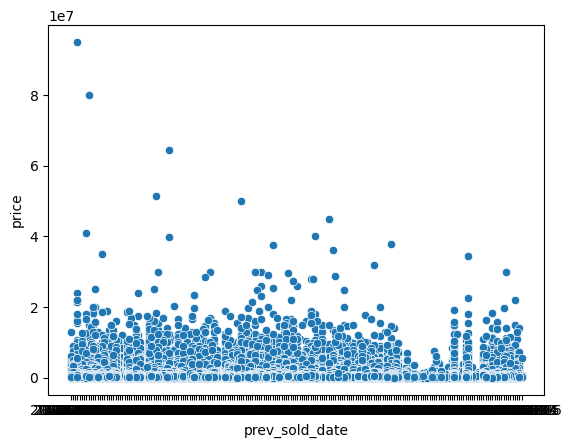

In [24]:
sns.scatterplot(x = 'prev_sold_date', y = 'price', data = df_sold)
plt.savefig('scatter_prev_sold_price.png')


In [25]:
# adjust price to view trend better
# look at stats for price
df_sold['price'].describe()

count    8.071660e+05
mean     4.793072e+05
std      6.534464e+05
min      1.000000e+00
25%      2.049000e+05
50%      3.449000e+05
75%      5.500000e+05
max      9.500000e+07
Name: price, dtype: float64

In [26]:
df_sold['price'].max()

95000000.0

In [27]:
df_sold['price'].min()

1.0

In [28]:
# figure out dates (since can't read any on x axis)
df_sold['prev_sold_date'].max()

'3019-04-02'

In [29]:
df_sold['prev_sold_date'].min()

'2021-10-18'

In [30]:
#lets try a histogram
hist = df_sold['price].plot'

SyntaxError: incomplete input (2353841289.py, line 2)

### Create new column 'lot_classification' based on acre_lot size

In [31]:
# Create new column 'lot_classification' based on 'acre_lot' size
df['lot_classification'] = df['acre_lot'].apply(lambda x: 'big lots' if x > 10000 else 'average lots')


In [32]:
df.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,build_status,lot_classification
0,103378.0,for_sale,1,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,new_build,average lots
1,52707.0,for_sale,1,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,new_build,average lots
2,103379.0,for_sale,1,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,new_build,average lots
3,31239.0,for_sale,1,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,Ponce,Puerto Rico,731.0,1800.000,0,Low price,new_build,average lots
4,34632.0,for_sale,1,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,new_build,average lots


In [33]:
# Counting the classifications
big_lots_count = df['lot_classification'].value_counts().get('big lots', 0)
average_lots_count = df['lot_classification'].value_counts().get('average lots', 0)

print(f"Number of 'big_lots': {big_lots_count}")
print(f"Number of 'average_lots': {average_lots_count}")


Number of 'big_lots': 354
Number of 'average_lots': 2213375


In [34]:
df.shape

(2213729, 18)

In [35]:
df.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,build_status,lot_classification
0,103378.0,for_sale,1,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,920.000,0,Low price,new_build,average lots
1,52707.0,for_sale,1,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price,new_build,average lots
2,103379.0,for_sale,1,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price,new_build,average lots
3,31239.0,for_sale,1,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,Ponce,Puerto Rico,731.0,1800.000,0,Low price,new_build,average lots
4,34632.0,for_sale,1,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price,new_build,average lots


### adjust all dates marked 0 in 'prev_sold_date' column to TODAY'S DATE (since the 0s were making it difficult to analyze the data)

In [36]:

from datetime import datetime

# Getting today's date
today_date = datetime.today().strftime('%Y-%m-%d')

# Replacing '0' with today's date
df['prev_sold_date'] = df['prev_sold_date'].replace('0', today_date)


In [37]:
# if that does not work:
# The date you want to use for replacement
#replacement_date = '2024-08-01'

# Replacing '0' with the specified date
#df['prev_sold_date'] = df['prev_sold_date'].replace('0', replacement_date)

In [38]:
df.head()

,brokered_by,status,status_id,price,bed,bath,acre_lot,street,city,state,city,state,zip_code,house_size,prev_sold_date,Price category,build_status,lot_classification
0,103378.0,for_sale,1,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,920.000,2024-08-11,Low price,new_build,average lots
1,52707.0,for_sale,1,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,Adjuntas,Puerto Rico,601.0,1527.000,2024-08-11,Low price,new_build,average lots
2,103379.0,for_sale,1,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,Juana Diaz,Puerto Rico,795.0,748.000,2024-08-11,Low price,new_build,average lots
3,31239.0,for_sale,1,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,Ponce,Puerto Rico,731.0,1800.000,2024-08-11,Low price,new_build,average lots
4,34632.0,for_sale,1,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,Mayaguez,Puerto Rico,680.0,2715.133,2024-08-11,Low price,new_build,average lots


In [39]:
# Counting occurrences of today's date in the 'prev_sold_date' column
today_date_count = df['prev_sold_date'].tolist().count(today_date)

print(f"Number of occurrences of today's date ({today_date}) in 'prev_sold_date': {today_date_count}")

Number of occurrences of today's date (2024-08-11) in 'prev_sold_date': 729851


In [40]:
df.shape

(2213729, 18)

## Export data as csv

In [199]:
df.to_csv(os.path.join(path, 'Prepared Data', 're_clean10.csv'))